In [151]:
import numpy as np
import pandas as pd
import matplotlib #
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import KFold

print("sklearn: {}".format(sklearn.__version__))

sklearn: 1.2.2


In [106]:
data_path = "creditcard.csv"
df = pd.read_csv(data_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [107]:
normal = df[df.Class==0].sample(frac=0.5, random_state=2020).reset_index(drop=True)
anomaly = df[df.Class == 1]

In [108]:
print(f"Normal: {normal.shape}")
print(f"Anomaly: {anomaly.shape}")

Normal: (142158, 31)
Anomaly: (492, 31)


In [109]:
normal_train, normal_test = train_test_split(normal, test_size=0.2, random_state=2020)
anomary_train, anomary_test = train_test_split(anomaly, test_size=0.2, random_state=2020)


In [110]:
normal_train, normal_validate = train_test_split(normal_train,test_size=0.25, random_state=2020)
anomary_train, anomary_valid = train_test_split(anomary_train, test_size=0.2, random_state=2020)

x_train = pd.concat((normal_train, anomary_train))
x_test = pd.concat((normal_test, anomary_test))
x_validate = pd.concat((normal_validate,anomary_valid))

answer = x_test

In [111]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73530,34352.0,0.625714,-0.756745,-0.207026,1.573003,-0.430353,-0.324872,0.507153,-0.071852,0.286757,...,0.150580,-0.127345,-0.355638,0.068798,0.597708,-0.256959,-0.041794,0.057961,298.4,0
10844,37979.0,-3.599816,2.854945,0.122647,-0.650653,-0.210900,0.036756,0.466738,0.045659,2.342779,...,-0.425969,-0.501651,-0.036863,-0.475188,0.432695,0.271133,0.504334,0.954164,9.1,0
41719,140296.0,2.090150,-0.809654,-1.487035,-0.886458,-0.293804,0.000558,-0.993425,0.085090,-0.206622,...,0.265200,0.729405,0.018246,0.000239,-0.079172,-0.106284,0.015193,-0.014873,49.9,0
45057,46880.0,-6.131105,1.333765,-1.467154,0.883894,-1.682332,0.412291,1.685856,0.072326,2.364849,...,-0.905854,0.525180,-0.586162,0.070758,0.487457,-0.254797,0.468647,1.277798,250.0,0
23385,157506.0,-0.895992,0.110178,1.485191,0.214407,1.837806,5.400389,-0.941418,1.587009,0.890401,...,-0.103521,0.101878,-0.281217,0.711407,0.602229,-0.299615,0.425687,0.148959,32.6,0


In [112]:
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

x_train = x_train.drop("Class",axis=1)
x_test = x_test.drop("Class",axis=1)
x_validate = x_validate.drop("Class",axis=1)

In [113]:
print("Training sets:\nx_train: {} y_train:{}".format(x_train.shape, y_train.shape))
print("\nTesting sets:\nx_test:{} y_test:{}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} y_validate: {}".format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85608, 30) y_train:(85608,)

Testing sets:
x_test:(28531, 30) y_test:(28531,)

Validation sets:
x_validate: (28511, 30) y_validate: (28511,)


In [114]:
# 평균이 0이고 표준편차가 1이 되도록 정규화 : StandardScaler()
scaler = StandardScaler() # 함수 선언해서 식으로 할당
scaler.fit(pd.concat((normal, anomaly)).drop("Class",axis=1)) # 식 초기화

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

# 정규화

In [115]:
sk_model = LogisticRegression(random_state=None, max_iter=400, solver = 'newton-cg').fit(x_train, y_train)

In [116]:
preds = sk_model.predict(x_test)
eval_acc = sk_model.score(x_test, y_test)
auc_score = roc_auc_score(y_test, preds)
print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 85.343%
Eval Accuracy: 99.877%


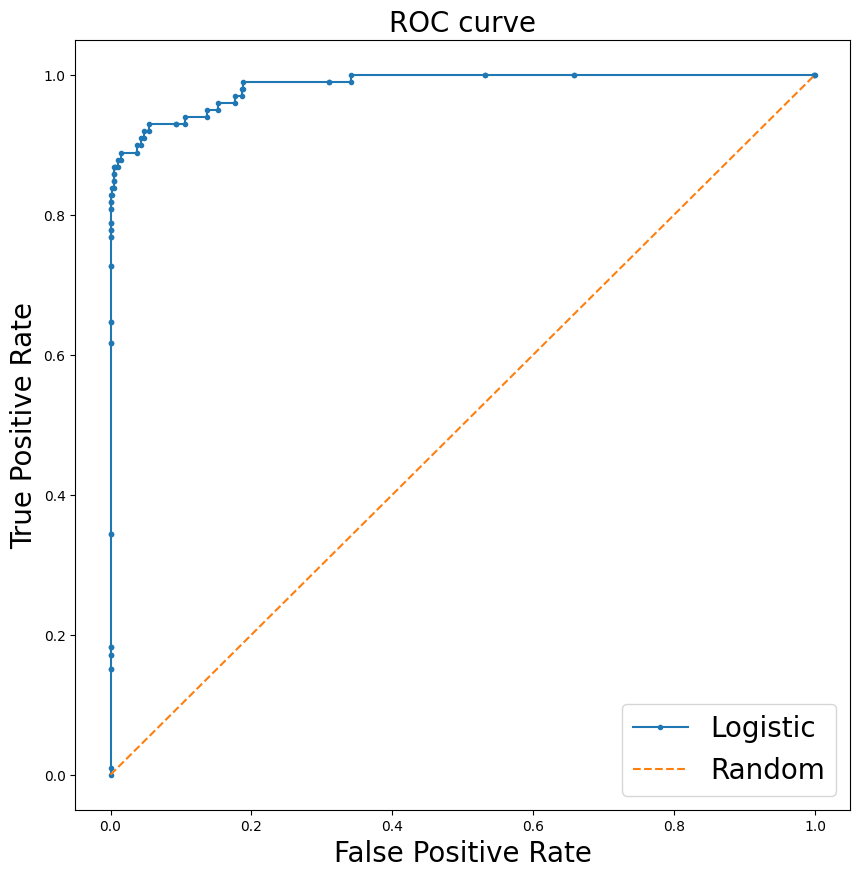

In [143]:
from scikitplot.metrics import plot_roc

pred = sk_model.predict_proba(x_test)[:,1]
model_fpr, model_tpr, model_thresholds = roc_curve(y_test,pred)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(len(x_test))]) 


plt.figure(figsize = (10,10))
plt.plot(model_fpr, model_tpr, marker = '.', label = "Logistic")
plt.plot(random_fpr, random_tpr, linestyle = '--', label = "Random")

plt.xlabel("False Positive Rate", size = 20)
plt.ylabel("True Positive Rate", size = 20)

plt.legend(fontsize = 20)

plt.title("ROC curve", size = 20)
plt.show()

In [154]:
conf_matrix = confusion_matrix(x_test, sk_model.predict(x_test))
ax = sns.heatmap(conf_matrix, annot=True, fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.xlabel('Actual')
plt.ylabel('Predicted')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [126]:
print(fpt, trp, thresholds)

[0.00000000e+00 2.11029826e-04 1.00000000e+00] [0.         0.70707071 1.        ] [2 1 0]
